<a href="https://colab.research.google.com/github/20R01A6703/FakeNewsDetection/blob/main/FakeNewsdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data frame of real(not fake)news
real_df=pd.read_csv("/content/sample_data/True.csv")
real_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
#data frame of fake news
fake_df=pd.read_csv("/content/sample_data/Fake.csv")
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:

fake_df['class']='Fake'
real_df['class']='True'

In [6]:
#merging fake and real news to form a train/test dataset
df=pd.concat([fake_df,real_df],ignore_index=True)
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


In [7]:
#shuffling data
from sklearn.utils import shuffle
df=shuffle(df)
df=df.reset_index(drop=True)
df

,title,text,subject,date,class
0,"U.S., Germany eye ways to deepen cyber collabo...",WASHINGTON (Reuters) - Senior U.S. and German ...,politicsNews,"March 24, 2016",True
1,BREAKING: D.C. Driver Plows Into Capitol Polic...,It happened around 9:30 a.m. at the 100 block ...,politics,"Mar 29, 2017",Fake
2,Kellyanne Conway Just Humiliated Herself On N...,Donald Trump sure hasn t done himself any favo...,News,"August 4, 2017",Fake
3,Japan PM's ruling bloc seen nearing 2/3 majori...,TOKYO (Reuters) - Japanese Prime Minister Shin...,worldnews,"October 11, 2017",True
4,"Trump says he is 'very, very close' to making ...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"October 23, 2017",True
...,...,...,...,...,...
44893,WATCH: Rick Santorum Torches Trump For Not Ta...,Even Donald Trump s staunchest allies in the R...,News,"November 8, 2017",Fake
44894,U.N. starting to gather testimony on Myanmar v...,GENEVA (Reuters) - U.N. investigators have sta...,worldnews,"September 19, 2017",True
44895,Trump says prepared to take on North Korea wit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 12, 2017",True
44896,Mexico foreign minister heads to U.S. to meet ...,MEXICO CITY (Reuters) - Mexico s Foreign Minis...,worldnews,"September 11, 2017",True


In [34]:
df.dtypes

text     object
class    object
dtype: object

In [8]:
#removing the unused columns

df=df.drop(['title','date'],axis=1)

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


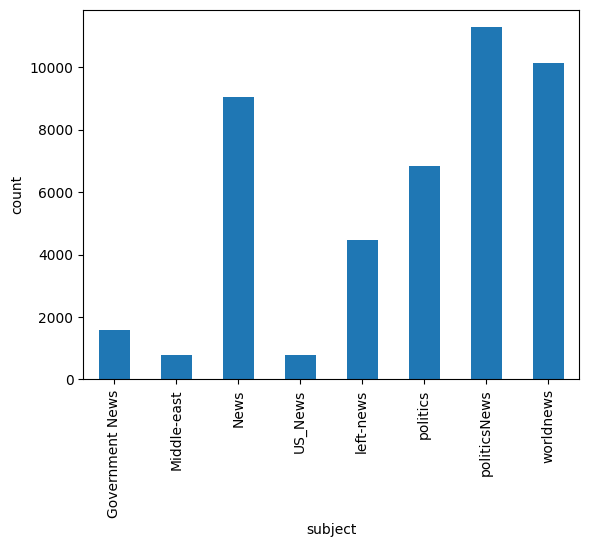

In [9]:
#summary of types of news subjects present in the data
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.ylabel("count")
plt.show()

In [11]:
df=df.drop(['subject'],axis=1)

class
Fake    23481
True    21417
Name: text, dtype: int64


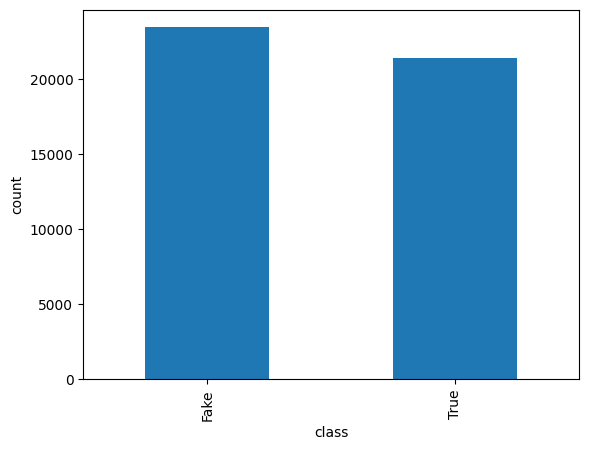

In [12]:
#No of fake and real news present in the data
print(df.groupby(['class'])['text'].count())
df.groupby(['class'])['text'].count().plot(kind="bar")
plt.ylabel("count")
plt.show()

In [13]:
#converting text to lowercase
df['text']=df['text'].apply(lambda  x:x.lower())
df.head()

,text,class
0,washington (reuters) - senior u.s. and german ...,True
1,it happened around 9:30 a.m. at the 100 block ...,Fake
2,donald trump sure hasn t done himself any favo...,Fake
3,tokyo (reuters) - japanese prime minister shin...,True
4,washington (reuters) - u.s. president donald t...,True


In [14]:
#removing punctuations
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
df['text'] = df['text'].apply(punctuation_removal)

In [15]:
#removing stop words from text
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
df

,text,class
0,washington reuters senior us german officials ...,True
1,happened around 930 100 block independence ave...,Fake
2,donald trump sure done favors appointing equal...,Fake
3,tokyo reuters japanese prime minister shinzo a...,True
4,washington reuters us president donald trump t...,True
...,...,...
44893,even donald trump staunchest allies republican...,Fake
44894,geneva reuters un investigators started collec...,True
44895,washington reuters us president donald trump s...,True
44896,mexico city reuters mexico foreign minister lu...,True


In [17]:
# function to find most common words
from nltk import tokenize
token_space=tokenize.WhitespaceTokenizer() #divides text into words on the basis of space
def frq_counts(data,n):
  all_words=' '.join([data for data in data["text"]])

  tokens=token_space.tokenize(all_words)
  freq=nltk.FreqDist(tokens)

  words=pd.DataFrame({"Word":list(freq.keys()),"Frequency":list(freq.values())})

  words=words.nlargest(n=n,columns='Frequency')

  plt.figure(figsize=(14,7))
  ax=sns.barplot(data=words,x="Word",y="Frequency",color="blue")

  plt.ylabel("Count")
  plt.show()

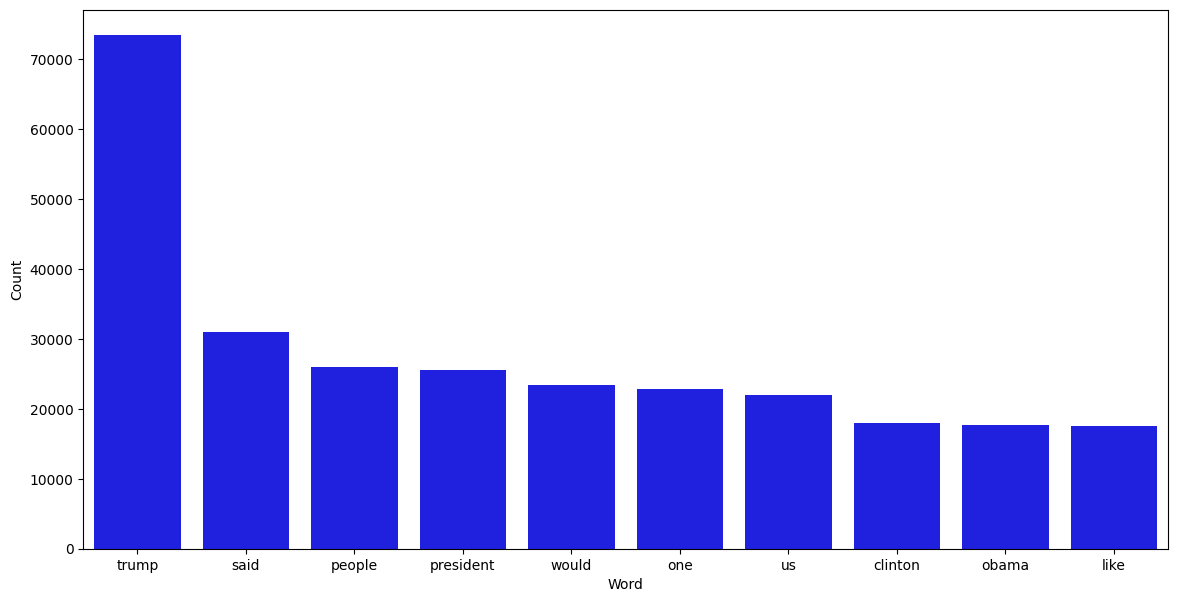

In [19]:
#plotting 10 common words in fake news
frq_counts(df[df["class"]=='Fake'],10)

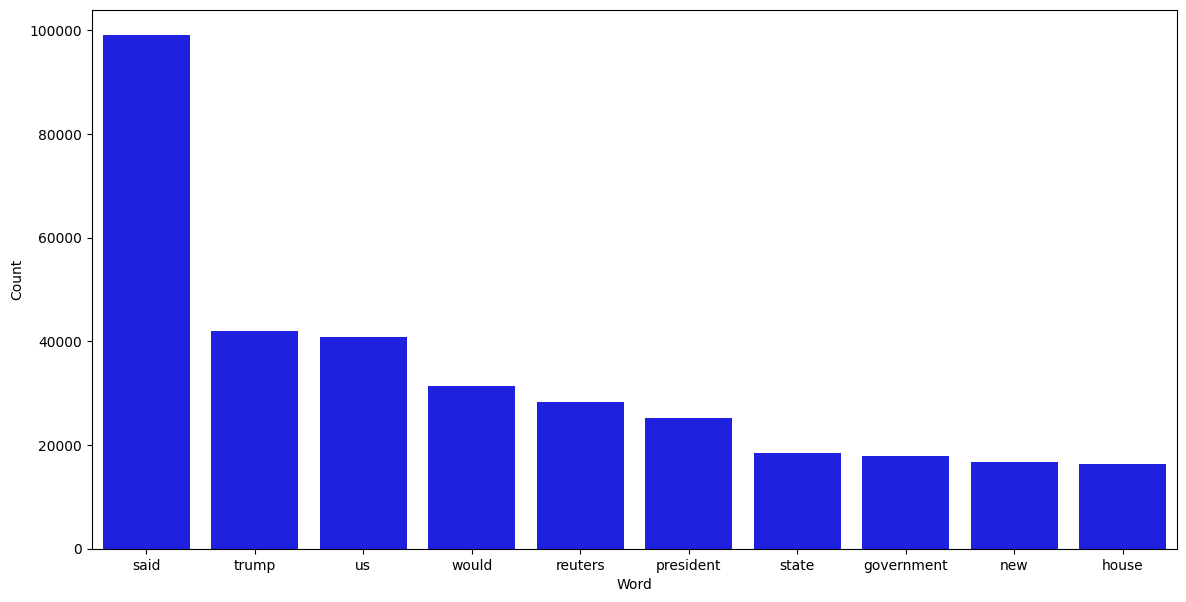

In [20]:
#plotting 10 common words in real(True) news
frq_counts(df[df["class"]=='True'],10)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('DTC', LogisticRegression())])
# Fitting the model
DTC = pipe.fit(df['text'], df['class'])


In [62]:
def func_topred(s):
  print("The text inputted for predictions is "+s)

  t=punctuation_removal(s)
  t =  ' '.join([word for word in t.split() if word not in (stop)])
  s=['']
  s[0]=t
  j=DTC.predict(s)
  print("News is "+str(j[0]))


In [64]:
s=input() #enter the news text to predict real or fake
func_topred(s)

The state government said to follow covid rules.
The text inputted for predictions is The state government said to follow covid rules.
News is True


In [65]:
s=input() #enter the news text to predict real or fake
func_topred(s)

state government not to use safety masks
The text inputted for predictions is state government not to use safety masks
News is Fake
